#**INDIVIDUAL ID** **:** PTID-CDS-APR-24-1892

#**BATCH ID** **:** 20-NOV-CDS-WDM09-BAN

#**PROJECT** **:** PRCP- 1001- RiceLeaf disease detection

#**Problem Statement**

##**Task 1:-**Prepare a complete data analysis report on the given data.

##**Task 2:-**Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

##**Task3:-**Analyze various techniques like Data Augmentation, etc and create a report on that.


##**Domain Expertise**
- The dataset includes 119 jpg images of rice leaves effected by different types of diseases.
- The classes are:-
- **Bacterial Leaf Blight**
-  Bacterial leaf blight of rice (BB) is a disease caused by the Gram-negative bacterium Xanthomonas oryzae pv.Bacterial leaf blight is often first noticed in fields as brown areas about 3 to 4 feet in diameter. Leaf symptoms appear as irregular brown spots, often beginning on the leaf margins. Lesions initially have an irregular yellow halo and may appear watersoaked.
- **Brown Spot**
- Brown spot is a fungal disease that can infect both seedlings and mature plants. The disease causes blight on seedlings, which are grown from heavily infected seeds, and can cause 10-58% seedling mortality.
- **Leaf Smut**
- Leaf smut, caused by the fungus Entyloma oryzae, is a widely distributed, but somewhat minor, disease of rice.The fungus produces slightly raised, angular, black spots (sori) on both sides of the leaves.The black spots are about 0.5 to 5.0 millimeters long and 0.5 to 1.5 millimeters wide.
**The class Leaf Smut contains 39 jpg images while rest all classes contain 40 jpg images.**



##**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,model_from_json
from keras.layers import Conv2D , MaxPooling2D , Flatten ,Dense ,Dropout
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import urllib

In [ ]:
input_shape_2D = (224,224)
input_shape_3D = (224,224,3)
seed = 1
batch_size = 5
epochs = 30

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**LOADING THE DATA**

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(directory="/content/drive/My Drive/rice leaf",
                                                  labels='inferred',
                                                  label_mode='int',
                                                  class_names=None,
                                                  color_mode='rgb',
                                                  image_size=input_shape_2D,
                                                  seed=seed)

Found 119 files belonging to 3 classes.


In [ ]:
# print class names

class_names = data.class_names
class_names

['Bacterial leaf blight-20200814T055237Z-001',
 'Brown spot-20200814T055208Z-001',
 'Leaf smut-20200814T055530Z-001']

#### The 3 Classes are - Bacterial leaf blight, Brown spot, Leaf smut.

In [ ]:
# Initialize an empty dictionary to store class counts
class_counts = {}

# Iterate through the dataset to count occurrences of each class label
for images, labels in data:
    for label in labels:
        class_counts[label.numpy()] = class_counts.get(label.numpy(), 0) + 1

# Print the class counts
print(class_counts)


{0: 40, 1: 40, 2: 39}


##**Image Visualisation**

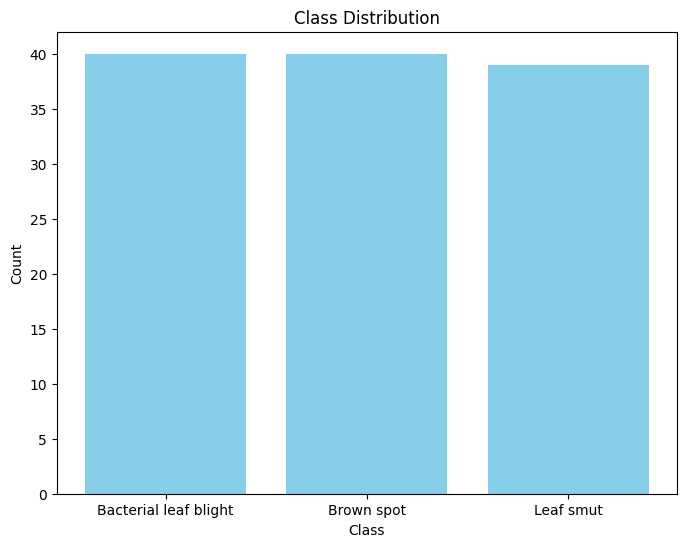

In [ ]:
# Class names and counts
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
class_counts = [40, 40, 39]  # Replace with your actual counts

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

- From the graph we can clearly see that there are a total of 119 images.
- 40 in Bacterial Leaf Blight and Brown Spot.
- 39 images available in Leaf Smut.

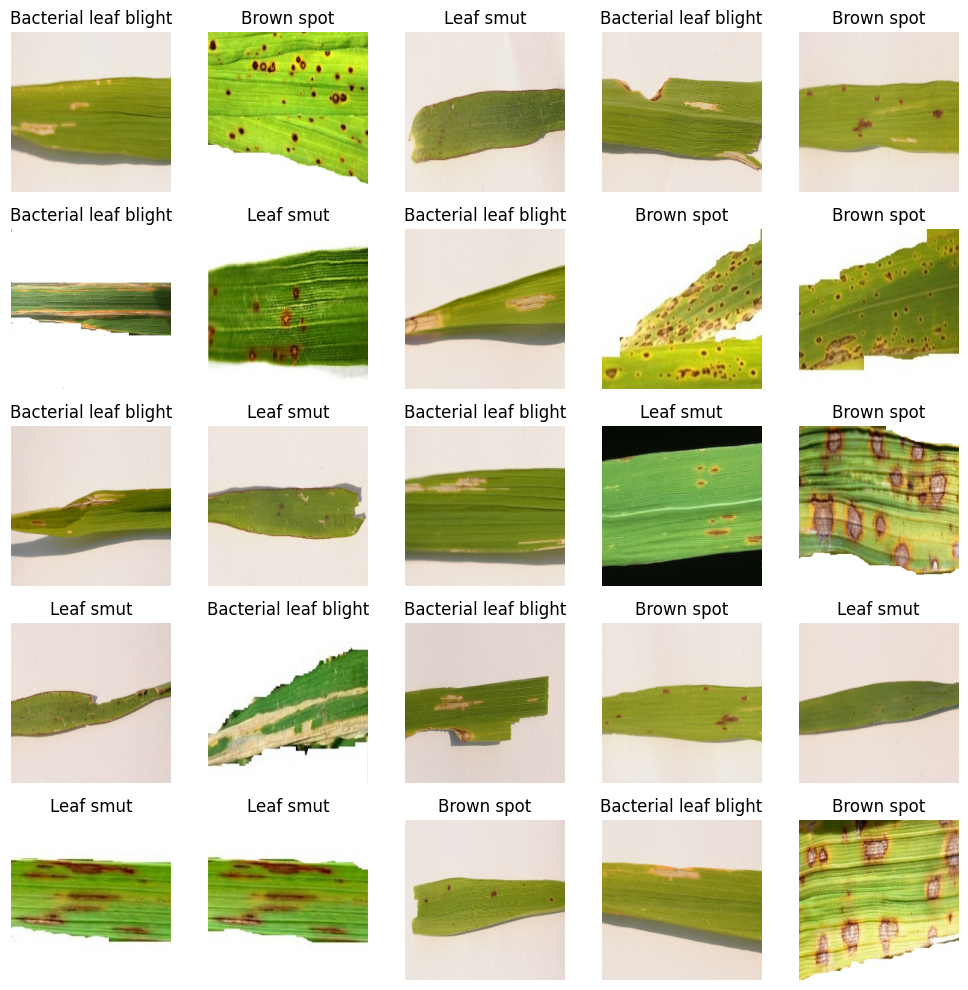

In [ ]:
plt.figure(figsize=(10,10))
for images , labels in data.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()

### These are the inputs of our model.

In [ ]:
# Create Dependent(y) and Independent(X) variable

X = []
y = []

for images , labels in data:
    X.append(images.numpy())
    y.append(labels.numpy())


# convert X , y list into numpy array

X = np.concatenate(X ,axis=0)
y = np.concatenate(y ,axis=0)

In [ ]:
X

array([[[[  4.761161 ,   9.761161 ,   3.7611609],
         [  5.566964 ,   9.716518 ,   4.       ],
         [  9.417412 ,  10.611608 ,   5.6116076],
         ...,
         [  6.       ,  11.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ]],

        [[  4.761161 ,   9.761161 ,   3.7611609],
         [  5.566964 ,   9.716518 ,   4.       ],
         [  9.417412 ,  10.611608 ,   5.6116076],
         ...,
         [  6.       ,  11.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ]],

        [[  4.761161 ,   9.761161 ,   3.7611609],
         [  5.566964 ,   9.716518 ,   4.       ],
         [  9.417412 ,  10.611608 ,   5.6116076],
         ...,
         [  6.       ,  11.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ]],

        ...,

        [[ 10.238839 ,  11.238839 ,   

In [ ]:
X = X.astype('float32')/255

##**Spliting Dataset into Train and Test/Validation data**

In [ ]:
# Splitt data into train and test / validation

X_train, X_test = X[:95 ],X[95:]
y_train, y_test = y[:95] ,y[95:]


In [ ]:
X_train.shape , X_test.shape

((95, 224, 224, 3), (24, 224, 224, 3))

In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train ,len(class_names))
y_test = to_categorical(y_test ,len(class_names))

##**Model Creation**

In [ ]:
# relu - the usage of ReLU helps to prevent the exponential growth in the computation required to operate the neural network.
         #It has a derivative of either 0 or 1, depending on whether its input is negative or not
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 25s 6s/step - loss: 3.8511 - accuracy: 0.3816 - val_loss: 2.0779 - val_accuracy: 0.4737
Epoch 2/30
3/3 [==============================] - 15s 4s/step - loss: 2.0621 - accuracy: 0.3553 - val_loss: 1.1392 - val_accuracy: 0.2632
Epoch 3/30
3/3 [==============================] - 9s 3s/step - loss: 1.0399 - accuracy: 0.5395 - val_loss: 1.0700 - val_accuracy: 0.4211
Epoch 4/30
3/3 [==============================] - 10s 2s/step - loss: 0.9816 - accuracy: 0.5395 - val_loss: 1.0314 - val_accuracy: 0.4737
Epoch 5/30
3/3 [==============================] - 10s 3s/step - loss: 1.0851 - accuracy: 0.3947 - val_loss: 0.9460 - val_accuracy: 0.5789
Epoch 6/30
3/3 [==============================] - 10s 3s/step - loss: 0.8242 - accuracy: 0.5658 - val_loss: 0.8559 - val_accuracy: 0.5789
Epoch 7/30
3/3 [==============================] - 13s 3s/step - loss: 0.7786 - accuracy: 0.6711 - val_loss: 0.8066 - val_accuracy: 0.5263
Epoch 8/30
3/3 [===================

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 1s 653ms/step - loss: 1.7502 - accuracy: 0.5833
Test accuracy: 0.5833


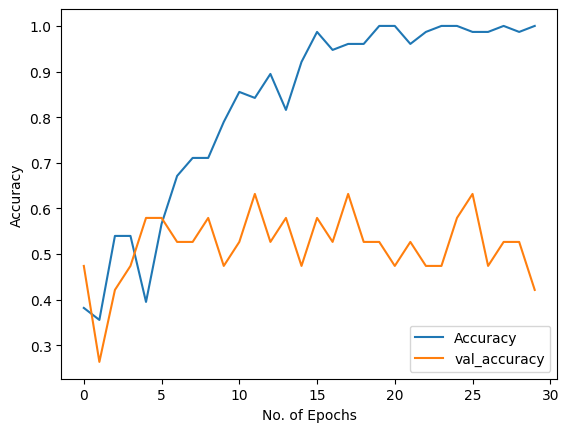

In [ ]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

### As the model shows only 70% accuracy we are doing Data Augmentation to improve the accuracy.

##**Data Augmentation**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

##**Model Creation using different Optimizers after Data Augmentation**

###**1.Adam optimizer**

In [ ]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
input_shape = (224, 224, 3)
num_classes = 3
model_da = create_model(input_shape, num_classes)

In [ ]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
history = model_da.fit(augmented_data, epochs=50,steps_per_epoch=len(X_train) // 25, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 18s 6s/step - loss: 1.8088 - accuracy: 0.2737 - val_loss: 1.0979 - val_accuracy: 0.3333
Epoch 2/50
3/3 [==============================] - 15s 4s/step - loss: 1.1480 - accuracy: 0.3053 - val_loss: 1.1142 - val_accuracy: 0.3333
Epoch 3/50
3/3 [==============================] - 15s 4s/step - loss: 1.0946 - accuracy: 0.4000 - val_loss: 1.1131 - val_accuracy: 0.3333
Epoch 4/50
3/3 [==============================] - 25s 10s/step - loss: 1.0928 - accuracy: 0.3368 - val_loss: 1.0901 - val_accuracy: 0.3333
Epoch 5/50
3/3 [==============================] - 15s 5s/step - loss: 1.1136 - accuracy: 0.2947 - val_loss: 1.0936 - val_accuracy: 0.4583
Epoch 6/50
3/3 [==============================] - 15s 4s/step - loss: 1.1052 - accuracy: 0.3895 - val_loss: 1.1281 - val_accuracy: 0.2500
Epoch 7/50
3/3 [==============================] - 17s 5s/step - loss: 1.0991 - accuracy: 0.3579 - val_loss: 1.1148 - val_accuracy: 0.2500
Epoch 8/50
3/3 [=================

In [ ]:
test_loss, test_accuracy = model_da.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 1s 782ms/step - loss: 0.7648 - accuracy: 0.6250
Test accuracy: 0.6250


### Model shows an accuracy of 87.50 % for Adam Optimizer.

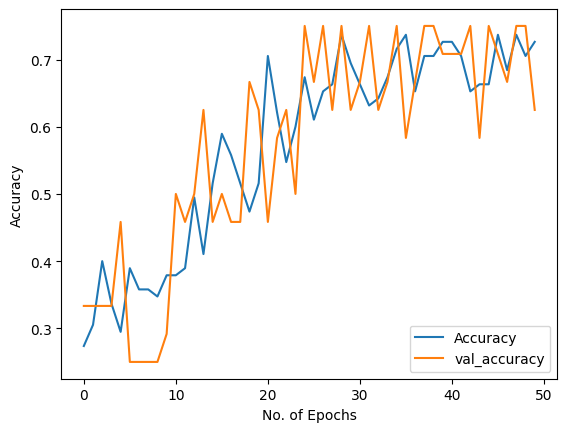

In [ ]:
#Ploting the Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

###**2.RMSProp Optimizer**

In [ ]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
input_shape = (224, 224, 3)
num_classes = 3
model_rms = create_model(input_shape, num_classes)

In [ ]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
history = model_rms.fit(augmented_data, epochs=50,steps_per_epoch=len(X_train) // 25, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 19s 5s/step - loss: 4.7266 - accuracy: 0.3053 - val_loss: 1.0823 - val_accuracy: 0.4167
Epoch 2/50
3/3 [==============================] - 16s 6s/step - loss: 1.1676 - accuracy: 0.3158 - val_loss: 1.9160 - val_accuracy: 0.2500
Epoch 3/50
3/3 [==============================] - 16s 5s/step - loss: 1.3620 - accuracy: 0.2947 - val_loss: 1.1055 - val_accuracy: 0.2500
Epoch 4/50
3/3 [==============================] - 15s 5s/step - loss: 1.1011 - accuracy: 0.3053 - val_loss: 1.1027 - val_accuracy: 0.2500
Epoch 5/50
3/3 [==============================] - 14s 5s/step - loss: 1.0953 - accuracy: 0.3789 - val_loss: 1.0967 - val_accuracy: 0.4167
Epoch 6/50
3/3 [==============================] - 16s 5s/step - loss: 1.0939 - accuracy: 0.3895 - val_loss: 1.0976 - val_accuracy: 0.3750
Epoch 7/50
3/3 [==============================] - 15s 5s/step - loss: 1.0790 - accuracy: 0.4211 - val_loss: 1.0720 - val_accuracy: 0.3750
Epoch 8/50
3/3 [==================

In [ ]:
test_loss, test_accuracy = model_rms.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 1s 798ms/step - loss: 0.7734 - accuracy: 0.6667
Test accuracy: 0.6667


### Model shows an accuracy of 50% for RMSProp Optimizer

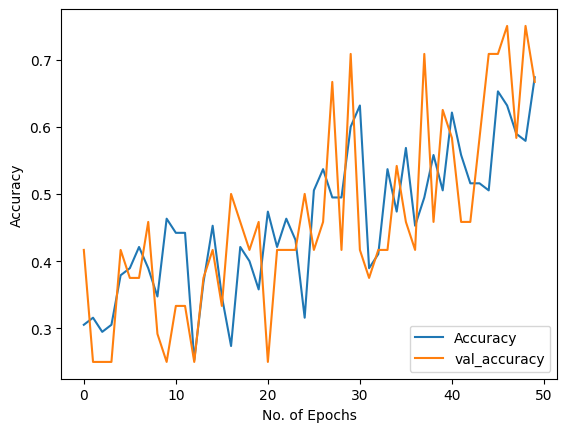

In [ ]:
#Ploting the Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

##**3.SGD Optimizer**

In [ ]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
input_shape = (224, 224, 3)
num_classes = 3
model_sgd = create_model(input_shape, num_classes)

In [ ]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
history = model_sgd.fit(augmented_data, epochs=50,steps_per_epoch=len(X_train) // 25, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 22s 8s/step - loss: 0.9931 - accuracy: 0.4526 - val_loss: 0.9985 - val_accuracy: 0.5417
Epoch 2/50
3/3 [==============================] - 17s 5s/step - loss: 1.0093 - accuracy: 0.4842 - val_loss: 1.0325 - val_accuracy: 0.4583
Epoch 3/50
3/3 [==============================] - 19s 5s/step - loss: 1.0172 - accuracy: 0.4421 - val_loss: 1.0002 - val_accuracy: 0.3750
Epoch 4/50
3/3 [==============================] - 16s 5s/step - loss: 1.0336 - accuracy: 0.4947 - val_loss: 1.0221 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 14s 5s/step - loss: 1.0376 - accuracy: 0.4000 - val_loss: 1.0071 - val_accuracy: 0.5833
Epoch 6/50
3/3 [==============================] - 15s 5s/step - loss: 1.0252 - accuracy: 0.5053 - val_loss: 1.0318 - val_accuracy: 0.4583
Epoch 7/50
3/3 [==============================] - 16s 6s/step - loss: 1.0201 - accuracy: 0.4526 - val_loss: 0.9937 - val_accuracy: 0.5417
Epoch 8/50
3/3 [==================

In [ ]:
test_loss, test_accuracy = model_sgd.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 1s 1s/step - loss: 0.9755 - accuracy: 0.5000
Test accuracy: 0.5000


### Model shows an accuracy of 29% for SGD Optimizer.

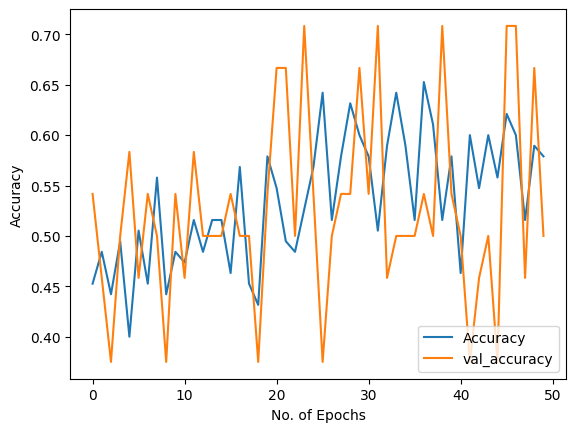

In [ ]:
#Ploting the Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

###**4.ADAGRAD Optimizer**

In [ ]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
input_shape = (224, 224, 3)
num_classes = 3
model_adagrad = create_model(input_shape, num_classes)

In [ ]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [ ]:
history = model_adagrad.fit(augmented_data, epochs=50,steps_per_epoch=len(X_train) // 25, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 16s 4s/step - loss: 1.1029 - accuracy: 0.3158 - val_loss: 1.1022 - val_accuracy: 0.2083
Epoch 2/50
3/3 [==============================] - 15s 4s/step - loss: 1.0941 - accuracy: 0.3789 - val_loss: 1.1039 - val_accuracy: 0.2500
Epoch 3/50
3/3 [==============================] - 15s 4s/step - loss: 1.0980 - accuracy: 0.3368 - val_loss: 1.1058 - val_accuracy: 0.2500
Epoch 4/50
3/3 [==============================] - 15s 5s/step - loss: 1.0955 - accuracy: 0.3789 - val_loss: 1.1073 - val_accuracy: 0.2500
Epoch 5/50
3/3 [==============================] - 15s 4s/step - loss: 1.1050 - accuracy: 0.3263 - val_loss: 1.1092 - val_accuracy: 0.2500
Epoch 6/50
3/3 [==============================] - 15s 5s/step - loss: 1.1050 - accuracy: 0.3158 - val_loss: 1.1087 - val_accuracy: 0.2500
Epoch 7/50
3/3 [==============================] - 14s 5s/step - loss: 1.0960 - accuracy: 0.3789 - val_loss: 1.1094 - val_accuracy: 0.2500
Epoch 8/50
3/3 [==================

In [ ]:
test_loss, test_accuracy = model_adagrad.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 1s 837ms/step - loss: 1.0951 - accuracy: 0.2500
Test accuracy: 0.2500


### Model shows an accuracy of 29% for ADAGRAD  Optimizer

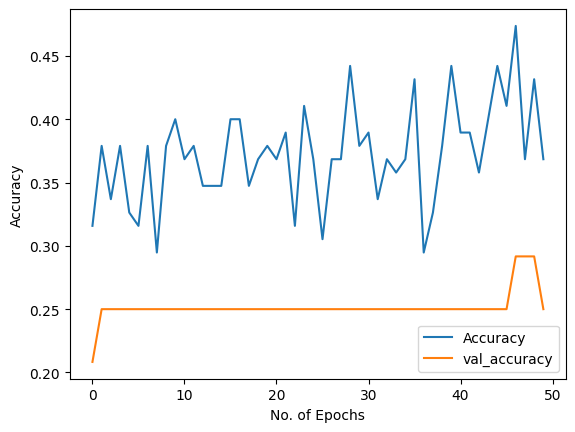

In [ ]:
#Ploting the Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

### Finalising the models with different optimizer

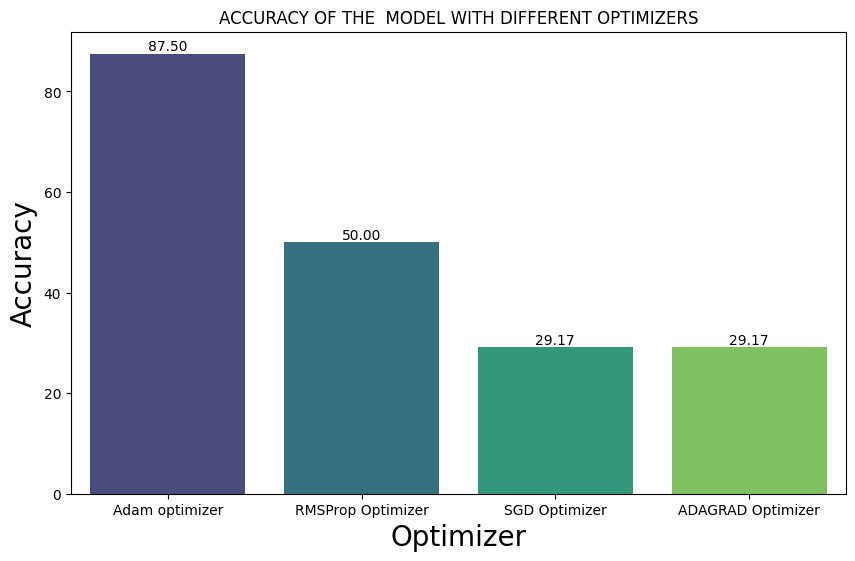

In [ ]:
# comparison of accuracy of the models with different optimizer
categories=['Adam optimizer','RMSProp Optimizer','SGD Optimizer','ADAGRAD Optimizer']
values=[87.50,50.00,29.17,29.17]

# Create DataFrame
data = pd.DataFrame({'Optimizer': categories, 'Accuracy': values})

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Optimizer', y='Accuracy', data=data, palette='viridis')

# Add values on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Add labels and title
plt.xlabel('Optimizer',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('ACCURACY OF THE  MODEL WITH DIFFERENT OPTIMIZERS')

# Show plot
plt.show()

### INSIGHT
- 1.Adam optimizer shows an accuracy of 87.50.
- 2.RMSProp Optimizer shows an accuracy of 50.
- 3.SGD Optimizer shows an accuracy of 29.17.
- 4.ADAGRAD Optimizer shows an accuracy of 29.17.
- From all of the Optimizer, **Adam Optimizer** shows the most Accuracy of **87.50%**.

##**Predicting the Disease Class by using Adam Optimizer**

In [ ]:
# make prediction for X_test

y_prediction = model_da.predict(X_test)

leaf_class = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

1/1 [==============================] - 1s 890ms/step


In [ ]:
# get the predicted class for each sample
predicted_classes = np.argmax(y_prediction, axis=1)
print(predicted_classes)

[1 0 2 0 2 2 1 2 0 2 0 0 1 0 2 2 0 0 0 0 0 0 1 0]


In [ ]:
# Assuming you have 'y_hat' for predictions and 'y_test' for ground truth
# Assuming 'leaf_class' is a list of class labels

# Plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(30, 25))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=100, replace=True)):
    ax = fig.add_subplot(10,10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))

    # Assuming 'y_hat' contains the model predictions
    pred_idx = np.argmax(y_prediction[idx])

    true_idx = np.argmax(y_prediction[idx])

    ax.set_title("{} ({})".format(leaf_class[pred_idx], leaf_class[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

plt.tight_layout()

##**For checking the performance ,we took 100 samples and 100 samples were accurately predicted.**

In [ ]:
# print Accuracy

test_Accuracy = model_da.evaluate(X_test,y_test)
print(f"Model's Accuracy : {test_Accuracy[1]*100}")

save the model

In [ ]:
# Save model architecture as JSON
model_json = model_da.to_json()
with open("/content/drive/My Drive/RiceLeafClass/model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights
model_da.save_weights("/content/drive/My Drive/RiceLeafClass/model_weights.h5")


In [ ]:
# Load model architecture from JSON
with open('/content/drive/My Drive/RiceLeafClass/model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# Load model weights
loaded_model.load_weights("/content/drive/My Drive/RiceLeafClass/model_weights.h5")

## Predicting the Diseases using the Image From the PC

In [ ]:
# Define a dictionary mapping class indices to class labels
class_labels = {0: 'Bacterial leaf blight', 1: 'Brown spot', 2: 'Leaf smut'}  # Update with your class labels

def predict_image_from_path(image_path):
    # Load image
    img = cv2.imread(image_path)

    # Preprocess image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img = cv2.resize(img, (224, 224))  # adjust input size according to your model's input shape
    img = img.astype('float32')
    img /= 255.0  # normalize the pixel values
    img = np.expand_dims(img, axis=0)

    # Make prediction
    prediction = loaded_model.predict(img)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_labels.get(predicted_class_index, "Unknown")

    # Print prediction
    print("Predicted class:", predicted_class_name)

# Example usage: Predict using a training image
image_path = "/content/drive/My Drive/RiceLeafClass/Leaf smut/DSC_0317.JPG"  # Update with the path to your training image
predict_image_from_path(image_path)

##**Predict the diseases using Images from Google using its URL**

In [ ]:
# Define a dictionary mapping class indices to class labels
class_labels = {0: 'Bacterial leaf blight', 1: 'Brown spot', 2:'Leaf smut' }


def predict_image_from_url():
    # Prompt user to enter image URL
    image_url = input("Enter the URL of the image: ")

    # Load image from URL
    resp = urllib.request.urlopen(image_url)
    img = np.asarray(bytearray(resp.read()), dtype="uint8")
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

        # Preprocess image
    img = cv2.resize(img, (224, 224))  # adjust input size according to your model's input shape
    img = img.astype('float32')
    img /= 255.0  # normalize the pixel values
    img = np.expand_dims(img, axis=0)

    # Make prediction
    prediction = loaded_model.predict(img)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_labels.get(predicted_class_index, "Unknown")

    # Print prediction
    print("Predicted class:", predicted_class_name)

        # Print prediction
    print("Predicted class index:", predicted_class_index)
    # You can map the index to class label based on your model's classes

# Example usage
predict_image_from_url()

##**Conclusion:-**
- The dataset contains 119 jpg images of different diseases.
- Here,we had tried 4 Optimizers for model creation in which **Adam Optimizer** shows the higher accuracy of **87.50%**.Thus we can conclude that it works well for the Rice Leaf Disease Detection.
- By using the Adam Optimizer we tried it with the 100 samples of test data and it showed a great output and later we tried it with image from the PC as well by using the URL.The model accurately predicted them.
- Thus we can conclude that CNN model with Adam Optimizer is the best one for predicting the Rice Leaf Prediction.

##**Suggestion :-**
- As an Asian, Rice plays a major role in our daily diet.Thus production of healthy rice are very important as well.
- Some of the suggestions from our Analysis are :-
- Taking the prevention method before the disease get worse.
- Awareness programs for every farmers throughout the country.
- Give proper instructions,effects and prevention methods.
- Provide proper pesticides,fertilizers and quality seeds by the Government can make a big change in farmers life.

##**Risks :-**
- Data Loading and processing.
- High computational time.
- Optimizer showing less accuracy.
- Less information